# Common

In [29]:
import numpy as np
import json
import sys
import os
import h5py
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
rc('font', size=18)

## Get array and dictionaries

Unlike 2D, 3D is time consuming, especially when the CFL number is very small.

Get the 4D array from the error files from cases.

The ranks of 4D array indicates: 
- method
- cfl number
- resolution
- parameters

5 dictionaries are obtained from the 4D array and example usage

- methodcfl['EI']['0.01']
- methodreso['EI']['16']
- paramcfl['cpu']['0.5']
- paramreso['em']['64']
- resocfl['16']['0.01']

In [2]:
def get_cfldict(case_path, methods, cfls, reso, params):
    array3d = np.zeros([len(methods),len(cfls),len(params)])

    ii = 0 
    for case in methods:
        jj = 0
        for cfl in cfls:
            f=open(str(case_path + '/cfl_'+str(cfl)+'/'+str(reso)+'/'+case+'/errors.dat'))
            for line in f:
                if 'cpu' in line:
                    array3d[ii,jj,0] = float(line.split('=')[1])
                if 'realtive' in line:
                    array3d[ii,jj,1] = float(line.split('=')[1])
                if 'absolute' in line:
                    array3d[ii,jj,2] = float(line.split('=')[1])
                if 'conservation' in line:
                    array3d[ii,jj,3] = float(line.split('=')[1])
            jj +=1
        ii += 1
    
    methodcfl = {}
    for j in range(len(methods)):
        arr = array3d[j,:,:]
        pd_arr = pd.DataFrame(
            arr, 
            columns = params,
            index = cfls
            )
        methodcfl.update({str(methods[j]):pd_arr})
        
    paramcfl = {}
    for j in range(len(params)):
        arr = np.transpose(array3d[:,:,j])
        pd_arr = pd.DataFrame(
            arr, 
            columns = methods,
            index = cfls
            )
        paramcfl.update({str(params[j]):pd_arr})

        
    return paramcfl,methodcfl

In [3]:
def get_resodict(case_path, methods, cfl, resos, params):
    array3d = np.zeros([len(methods),len(resos),len(params)])

    ii = 0 
    for case in methods:
        jj = 0
        for reso in resos:
            f=open(str(case_path + '/cfl_'+str(cfl)+'/'+str(reso)+'/'+case+'/errors.dat'))
            for line in f:
                if 'cpu' in line:
                    array3d[ii,jj,0] = float(line.split('=')[1])
                if 'realtive' in line:
                    array3d[ii,jj,1] = float(line.split('=')[1])
                if 'absolute' in line:
                    array3d[ii,jj,2] = float(line.split('=')[1])
                if 'conservation' in line:
                    array3d[ii,jj,3] = float(line.split('=')[1])
            jj +=1
        ii += 1
    
    methodreso = {}
    for j in range(len(methods)):
        arr = array3d[j,:,:]
        pd_arr = pd.DataFrame(
            arr, 
            columns = params,
            index = resos
            )
        methodreso.update({str(methods[j]):pd_arr})
        
    paramreso = {}
    for j in range(len(params)):
        arr = np.transpose(array3d[:,:,j])
        pd_arr = pd.DataFrame(
            arr, 
            columns = methods,
            index = resos
            )
        paramreso.update({str(params[j]):pd_arr})

        
    return paramreso, methodreso

## plot functions

In [4]:
def plot_param_cfl(f,ax):
    x=f['EI'].keys()
    x=[float(i) for i in x]
    f2=f.to_numpy()
    style = ['-s','->','-*','-X','-D','-o']
    i = 0
    for me in f:
        ax.plot(x,np.abs(f[me].to_numpy()),style[i],markersize=10,
                fillstyle='none',label=me,alpha=0.8)
        i+=1
    ax.set_yscale('log')
    ax.set_aspect('auto')
    ax.set_xlabel(r'$\rm{CFL}$')
    ax.legend()

def plot_param_grid(f,ax):
    x=f['EI'].keys()
    x=[float(i) for i in x]
    f2=f.to_numpy()
    style = ['-s','->','-*','-X','-D','-o']
    i=0
    for me in f:
        ax.plot(x,np.abs(f[me].to_numpy()),style[i],markersize=10,
                fillstyle='none',label=me,alpha=0.7)
        i+=1
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_aspect('auto')
    ax.set_xlabel(r'$N$')
    ax.legend()


# Zalesak3D

In [5]:
methods = ["EI","LE","EILE3D","EILE3DS","EIEALE","WY"]
params = ["cpu","er","eg","em"]
resos = [16,32,64,128]
cfls = [0.05,0.1,0.15,0.2,0.25,0.3,0.5]
cfl = 0.3
reso = 64
case_path_z = 'Zalesak3D'

In [6]:
paramcfl_z,  methodcfl_z  =  get_cfldict(case_path_z, methods, cfls, reso, params)
paramreso_z, methodreso_z = get_resodict(case_path_z, methods, cfl, resos, params)

## $E_g$, CFL=0.3

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


,EI,LE,EILE3D,EILE3DS,EIEALE,WY
16,0.012267,0.012266,0.012749,0.012284,0.012235,0.012234
32,0.004216,0.004216,0.004458,0.004217,0.004230,0.004228
64,0.001271,0.001271,0.001346,0.001272,0.001267,0.001267
128,0.000603,0.000603,0.000686,0.000603,0.000602,0.000602


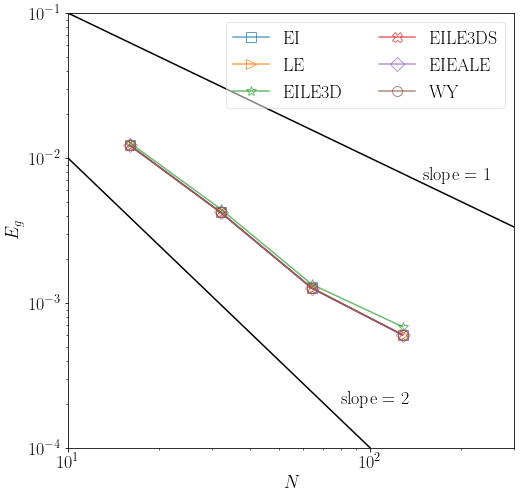

In [7]:
f1_zeg = paramreso_z['eg']
fig_zeg = plt.figure(figsize=[8,8])
ax1_zeg = fig_zeg.add_subplot(111) 
plot_param_grid(f1_zeg,ax1_zeg)
ax1_zeg.set_ylabel(r'$E_g$')


xx1 = [1e0,1e3]
yy1 = [1e0,1e-6]
yy2 = [1e0,0.001]
ax1_zeg.plot(xx1,yy1,'k')
ax1_zeg.plot(xx1,yy2,'k')
ax1_zeg.text(80,0.0002,'slope = 2')
ax1_zeg.text(150,0.007,'slope = 1')

ax1_zeg.set_aspect('auto')
# x, y range

ax1_zeg.set_ylim([0.0001,0.1])
ax1_zeg.set_xlim([10,300])
ax1_zeg.set_ylim([0.0001,0.1])
ax1_zeg.legend(ncol=2,facecolor='white', framealpha=0.5)
plt.savefig('plots/zalesak3d-eg-cfl03.pdf',box_inches='tight', pad_inches = 0)
f1_zeg

## $E_g$, N=64

,EI,LE,EILE3D,EILE3DS,EIEALE,WY
0.05,0.001508,0.001507,0.001671,0.001507,0.001507,0.001507
0.10,0.001396,0.001396,0.001506,0.001396,0.001396,0.001395
0.15,0.001347,0.001346,0.001435,0.001347,0.001346,0.001346
0.20,0.001314,0.001314,0.001396,0.001314,0.001314,0.001314
0.25,0.001289,0.001289,0.001367,0.001289,0.001289,0.001289
0.30,0.001271,0.001271,0.001346,0.001272,0.001267,0.001267
0.50,0.001196,0.001196,0.001289,0.001195,0.001197,0.001197


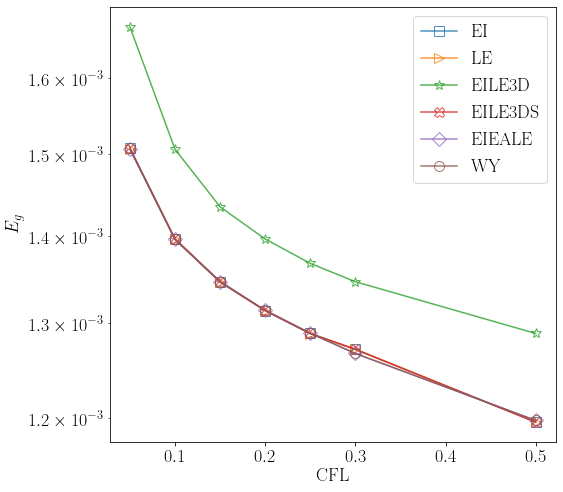

In [8]:
f1_zeg = paramcfl_z['eg']
fig_zeg = plt.figure(figsize=[8,8])
ax1_zeg = fig_zeg.add_subplot(111) 
plot_param_cfl(f1_zeg,ax1_zeg)
ax1_zeg.set_ylabel(r'$E_g$')
plt.savefig('plots/zalesak3d-eg-n64.pdf',box_inches='tight', pad_inches = 0)
f1_zeg 

## $E_m$, N=64

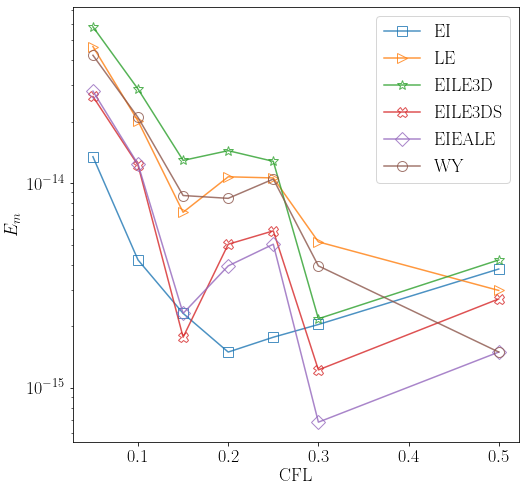

In [9]:
f1_zeg = paramcfl_z['em']
fig_zeg = plt.figure(figsize=[8,8])
ax1_zeg = fig_zeg.add_subplot(111) 
plot_param_cfl(f1_zeg,ax1_zeg)
ax1_zeg.set_ylabel(r'$E_m$')
plt.savefig('plots/zalesak3d-eg-n.pdf',box_inches='tight', pad_inches = 0)

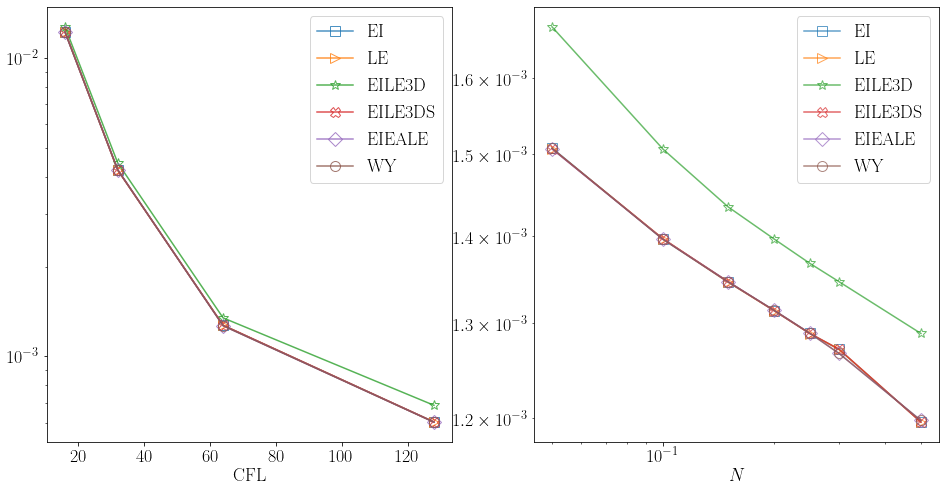

In [10]:
f1_zeg = paramreso_z['eg']
f2_zeg = paramcfl_z['eg']
fig_zeg = plt.figure(figsize=[16,8])
ax1_zeg = fig_zeg.add_subplot(121) 
plot_param_cfl(f1_zeg,ax1_zeg)
ax2_zeg = fig_zeg.add_subplot(122)
plot_param_grid(f2_zeg,ax2_zeg)

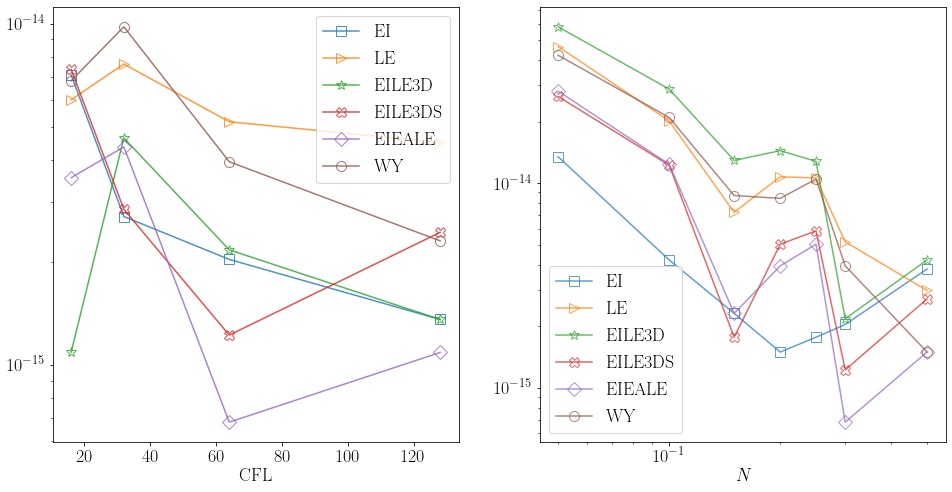

In [11]:
f1_zem = paramreso_z['em']
f2_zem = paramcfl_z['em']
# x=cfls
fig_zem = plt.figure(figsize=[16,8])
ax1_zem = fig_zem.add_subplot(121)
plot_param_cfl(f1_zem,ax1_zem)
ax2_zem = fig_zem.add_subplot(122)
plot_param_grid(f2_zem,ax2_zem)

# Single Vortex 3D

In [25]:
methods = ["EI","LE","EILE3D","EILE3DS","EIEALE","WY"]
params = ["cpu","er","eg","em"]
resos = [16,32,64,128]
cfls = [0.05,0.1,0.15,0.2,0.25,0.3,0.5,0.8,1.0]
cfl1 = 0.3
cfl2 = 1.0
reso = 64
case_path_s = 'SingleVortex3D'

In [26]:
paramcfl_s,  methodcfl_s  =  get_cfldict(case_path_s, methods, cfls, reso, params)
paramreso_s1, methodreso_s1 = get_resodict(case_path_s, methods, cfl1, resos, params)
paramreso_s2, methodreso_s2 = get_resodict(case_path_s, methods, cfl2, resos, params)

## $E_g$ CFL=0.3

,EI,LE,EILE3D,EILE3DS,EIEALE,WY
16,0.009680,0.009851,0.010103,0.011117,0.011775,0.009373
32,0.008449,0.006501,0.006984,0.006600,0.006537,0.006670
64,0.005304,0.003358,0.003118,0.003266,0.003342,0.003402
128,0.002726,0.001508,0.001374,0.001370,0.001379,0.001392


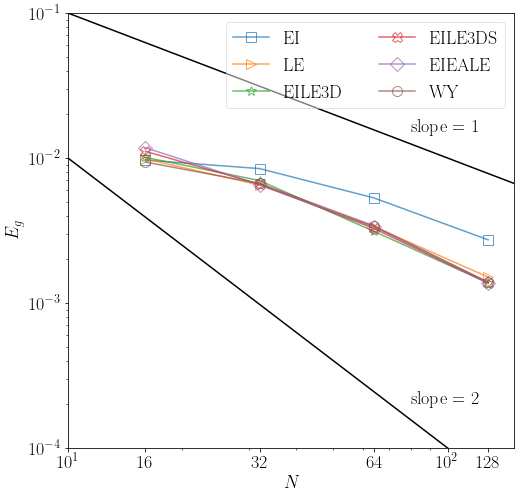

In [27]:
f1_seg = paramreso_s1['eg']
fig_seg = plt.figure(figsize=[8,8])
ax1_seg = fig_seg.add_subplot(111) 
plot_param_grid(f1_seg,ax1_seg)
ax1_seg.set_ylabel(r'$E_g$')


xx1 = [1e0,1e3]
yy1 = [1e0,1e-6]
yy2 = [1e0,0.001]
ax1_seg.plot(xx1,yy1,'k')
ax1_seg.plot(xx1,yy2,'k')
ax1_seg.text(80,0.0002,'slope = 2')
ax1_seg.text(80,0.015,'slope = 1')

ax1_seg.set_aspect('auto')
# x, y range

ax1_seg.set_xlim([10,150])
ax1_seg.set_ylim([0.0001,0.1])
ax1_seg.set_xticks([10,16,32,64,100,128])
ax1_seg.set_xticklabels([r'$10^1$','16','32','64',r'$10^2$','128'])
ax1_seg.legend(ncol=2,facecolor='white', framealpha=0.5)
plt.savefig('plots/sv3d-eg-cfl05.pdf',box_inches='tight', pad_inches = 0)
f1_seg

## $E_g$ CFL=1.0

,EI,LE,EILE3D,EILE3DS,EIEALE,WY
16,0.008299,0.012524,0.215487,0.010946,0.013597,0.013033
32,0.010279,0.010336,0.227926,0.008904,0.009710,0.009882
64,0.011301,0.006738,0.214253,0.005493,0.005747,0.005776
128,0.007650,0.003702,0.206350,0.002986,0.003072,0.003054


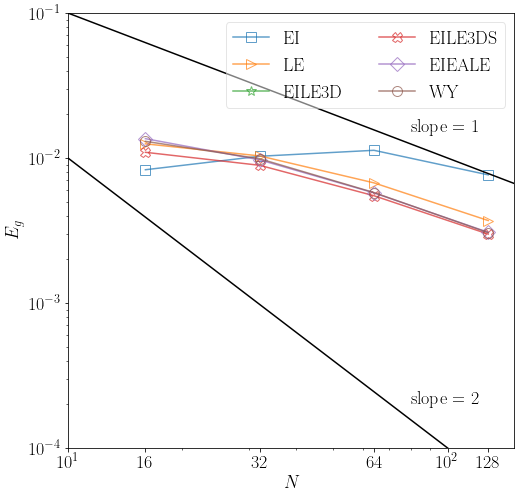

In [15]:
f1_seg = paramreso_s2['eg']
fig_seg = plt.figure(figsize=[8,8])
ax1_seg = fig_seg.add_subplot(111) 
plot_param_grid(f1_seg,ax1_seg)
ax1_seg.set_ylabel(r'$E_g$')


xx1 = [1e0,1e3]
yy1 = [1e0,1e-6]
yy2 = [1e0,0.001]
ax1_seg.plot(xx1,yy1,'k')
ax1_seg.plot(xx1,yy2,'k')
ax1_seg.text(80,0.0002,'slope = 2')
ax1_seg.text(80,0.015,'slope = 1')

ax1_seg.set_aspect('auto')
# x, y range

ax1_seg.set_ylim([0.0001,0.1])
ax1_seg.set_xlim([10,150])
ax1_seg.set_ylim([0.0001,0.1])
ax1_seg.set_xticks([10,16,32,64,100,128])
ax1_seg.set_xticklabels([r'$10^1$','16','32','64',r'$10^2$','128'])
ax1_seg.legend(ncol=2,facecolor='white', framealpha=0.5)
plt.savefig('plots/sv3d-eg-cfl10.pdf',box_inches='tight', pad_inches = 0)
f1_seg

## $E_g$ N=64

,EI,LE,EILE3D,EILE3DS,EIEALE,WY
0.05,0.003203,0.003181,0.002832,0.003190,0.003160,0.003205
0.10,0.003458,0.003039,0.002710,0.003156,0.003255,0.003061
0.15,0.003907,0.003197,0.002869,0.002999,0.003113,0.003141
0.20,0.004382,0.003152,0.003028,0.003139,0.003117,0.003184
0.25,0.004878,0.003257,0.003051,0.003173,0.003126,0.003222
0.30,0.005304,0.003358,0.003118,0.003266,0.003342,0.003402
0.50,0.007401,0.004168,0.075968,0.003875,0.003850,0.003922
0.80,0.010135,0.005718,0.172469,0.004715,0.004758,0.004848
1.00,0.011301,0.006738,0.214253,0.005493,0.005747,0.005776


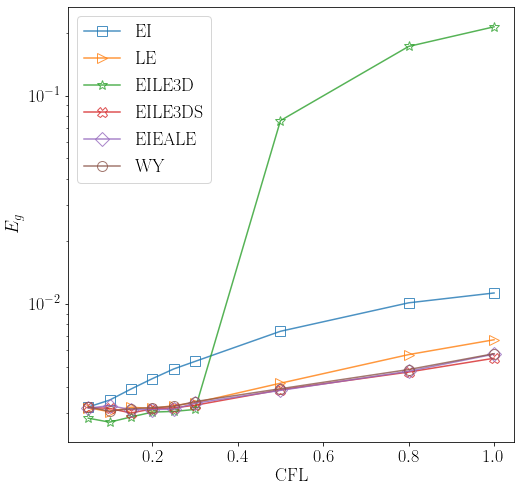

In [16]:
f1_seg = paramcfl_s['eg']
fig_seg = plt.figure(figsize=[8,8])
ax1_seg = fig_seg.add_subplot(111) 
plot_param_cfl(f1_seg,ax1_seg)
ax1_seg.set_ylabel(r'$E_g$')
plt.savefig('plots/sv3d-eg-n64.pdf',box_inches='tight', pad_inches = 0)
f1_seg

## $E_m$ CFL=0.3

,EI,LE,EILE3D,EILE3DS,EIEALE,WY
16,0.342820,-0.367817,2.096587e-14,0.022323,-0.000421,-5.762550e-15
32,0.171422,-0.161861,4.060540e-14,0.004434,-0.000113,6.011072e-15
64,0.081064,-0.073989,6.674798e-14,0.000459,0.000009,2.478510e-14
128,0.038729,-0.036215,8.380731e-14,0.000339,0.000009,4.576885e-14


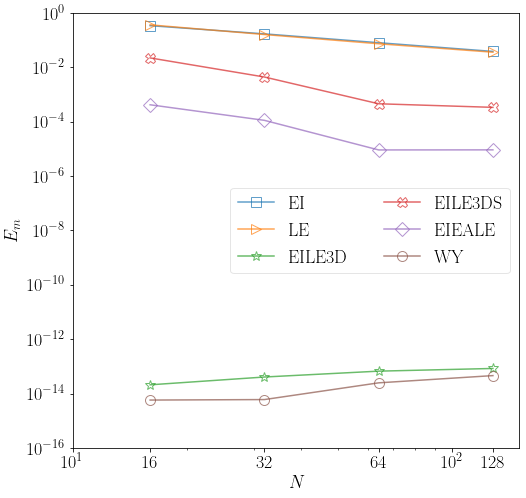

In [28]:
f1_seg = paramreso_s1['em']
fig_seg = plt.figure(figsize=[8,8])
ax1_seg = fig_seg.add_subplot(111) 
plot_param_grid(f1_seg,ax1_seg)
ax1_seg.set_ylabel(r'$E_m$')


# xx1 = [1e0,1e3]
# yy1 = [1e0,1e-6]
# yy2 = [1e0,0.001]
# ax1_seg.plot(xx1,yy1,'k')
# ax1_seg.plot(xx1,yy2,'k')
# ax1_seg.text(80,0.0002,'slope = 2')
# ax1_seg.text(150,0.007,'slope = 1')

ax1_seg.set_aspect('auto')
# x, y range

# ax1_seg.set_ylim([0.0001,0.1])
ax1_seg.set_xlim([10,150])
ax1_seg.set_ylim([1e-16,1])
ax1_seg.set_xticks([10,16,32,64,100,128])
ax1_seg.set_xticklabels([r'$10^1$','16','32','64',r'$10^2$','128'])
ax1_seg.legend(ncol=2,facecolor='white', framealpha=0.5)
plt.savefig('plots/sv3d-em-cfl05.pdf',box_inches='tight', pad_inches = 0)
f1_seg

## $E_m$, CFL=1.0

,EI,LE,EILE3D,EILE3DS,EIEALE,WY
16,0.825794,0.090358,-28.649311,0.253024,-0.027131,-0.091897
32,0.546061,-0.309453,-30.888282,0.025857,-0.005676,0.002590
64,0.266852,-0.210044,-29.493852,-0.002692,-0.000189,-0.000336
128,0.129229,-0.112859,-28.761016,-0.001295,0.000428,0.000601


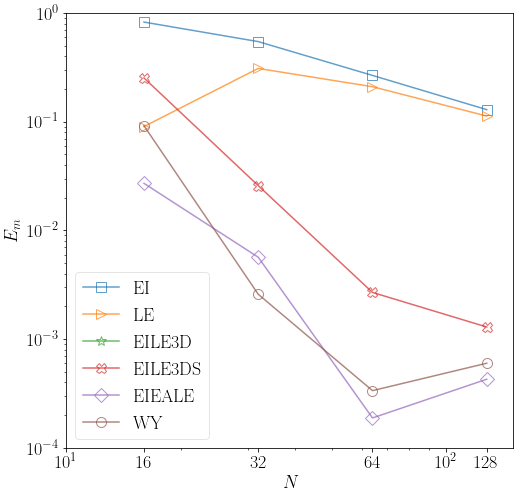

In [18]:
f1_seg = paramreso_s2['em']
fig_seg = plt.figure(figsize=[8,8])
ax1_seg = fig_seg.add_subplot(111) 
plot_param_grid(f1_seg,ax1_seg)
ax1_seg.set_ylabel(r'$E_m$')


# xx1 = [1e0,1e3]
# yy1 = [1e0,1e-6]
# yy2 = [1e0,0.001]
# ax1_seg.plot(xx1,yy1,'k')
# ax1_seg.plot(xx1,yy2,'k')
# ax1_seg.text(80,0.0002,'slope = 2')
# ax1_seg.text(150,0.007,'slope = 1')

ax1_seg.set_aspect('auto')
# x, y range

# ax1_seg.set_ylim([0.0001,0.1])
ax1_seg.set_xlim([10,150])
ax1_seg.set_ylim([0.0001,1])
ax1_seg.legend(ncol=1,facecolor='white', framealpha=0.5)
ax1_seg.set_xticks([10,16,32,64,100,128])
ax1_seg.set_xticklabels([r'$10^1$','16','32','64',r'$10^2$','128'])
plt.savefig('plots/sv3d-em-cfl10.pdf',box_inches='tight', pad_inches = 0)
f1_seg

## $E_m$ N=64

,EI,LE,EILE3D,EILE3DS,EIEALE,WY
0.05,0.013348,-0.013265,3.095683e-13,-0.000015,5.039381e-07,2.981573e-14
0.10,0.026801,-0.026161,1.733730e-13,-0.000025,2.317084e-06,1.496922e-14
0.15,0.040634,-0.038584,1.360726e-13,0.000333,4.887288e-06,3.558256e-14
0.20,0.053759,-0.051381,9.484594e-14,-0.000096,1.899950e-06,2.650287e-14
0.25,0.067027,-0.063506,8.147180e-14,-0.000181,3.630016e-06,2.147224e-14
0.30,0.081064,-0.073989,6.674798e-14,0.000459,9.183970e-06,2.478510e-14
0.50,0.133644,-0.119447,-1.023154e+01,-0.000859,-1.733844e-05,1.631890e-14
0.80,0.213217,-0.177425,-2.369676e+01,-0.001838,-2.705444e-04,-5.716127e-04
1.00,0.266852,-0.210044,-2.949385e+01,-0.002692,-1.886624e-04,-3.363648e-04


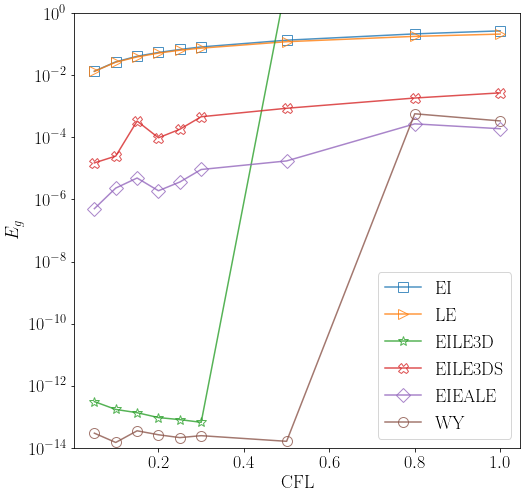

In [38]:
f1_seg = paramcfl_s['em']
fig_seg = plt.figure(figsize=[8,8])
ax1_seg = fig_seg.add_subplot(111) 
plot_param_cfl(f1_seg,ax1_seg)
ax1_seg.set_ylabel(r'$E_g$')
ax1_seg.set_ylim([1e-14,1])
plt.savefig('plots/sv3d-em-n64.pdf',box_inches='tight', pad_inches = 0)
f1_seg

# Reverse Vortex 3D

In [22]:
methods = ["EI","LE","EILE3D","EILE3DS","EIEALE","WY"]
params = ["cpu","er","eg","em"]
resos = [16,32,64,128]
cfls = [0.05,0.1,0.15,0.2,0.25,0.3,0.5,0.8,1.0]
cfl1 = 0.3
cfl2 = 1.0
reso = 64
case_path_r = 'ReverseVortex3D'

In [23]:
paramcfl_r,  methodcfl_r  =  get_cfldict(case_path_r, methods, cfls, reso, params)
paramreso_r1, methodreso_r1 = get_resodict(case_path_r, methods, cfl1, resos, params)
paramreso_r2, methodreso_r2 = get_resodict(case_path_r, methods, cfl2, resos, params)

## $E_g$, CFL=0.3

,EI,LE,EILE3D,EILE3DS,EIEALE,WY
16,0.011063,0.009828,0.010263,0.010404,0.010372,0.010599
32,0.006826,0.006255,0.006320,0.006352,0.006327,0.006112
64,0.002635,0.002447,0.002366,0.002415,0.002348,0.002337
128,0.000732,0.000629,0.000550,0.000597,0.000543,0.000544


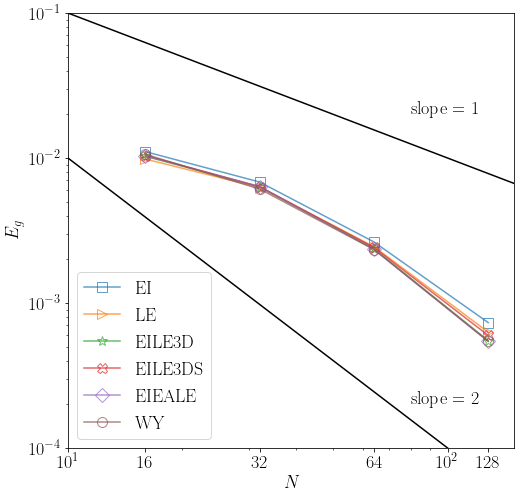

In [25]:
f1_reg = paramreso_r1['eg']
fig_reg = plt.figure(figsize=[8,8])
ax1_reg = fig_reg.add_subplot(111) 
plot_param_grid(f1_reg,ax1_reg)
ax1_reg.set_ylabel(r'$E_g$')


xx1 = [1e0,1e3]
yy1 = [1e0,1e-6]
yy2 = [1e0,0.001]
ax1_reg.plot(xx1,yy1,'k')
ax1_reg.plot(xx1,yy2,'k')
ax1_reg.text(80,0.0002,'slope = 2')
ax1_reg.text(80,0.02,'slope = 1')

ax1_reg.set_aspect('auto')
# x, y range

ax1_reg.set_ylim([0.0001,0.1])
ax1_reg.set_xlim([10,150])
ax1_reg.set_ylim([0.0001,0.1])
ax1_reg.set_xticks([10,16,32,64,100,128])
ax1_reg.set_xticklabels([r'$10^1$','16','32','64',r'$10^2$','128'])
plt.savefig('plots/rv3d-eg-cfl03.pdf',box_inches='tight', pad_inches = 0)
f1_reg

## $E_g$, CFL=1.0

,EI,LE,EILE3D,EILE3DS,EIEALE,WY
16,0.013467,0.012346,0.010371,0.011460,0.010716,0.010962
32,0.008025,0.007236,0.005549,0.006123,0.005908,0.005694
64,0.004570,0.004112,0.003279,0.003685,0.003337,0.003350
128,0.001857,0.001598,0.001132,0.001359,0.001146,0.001156


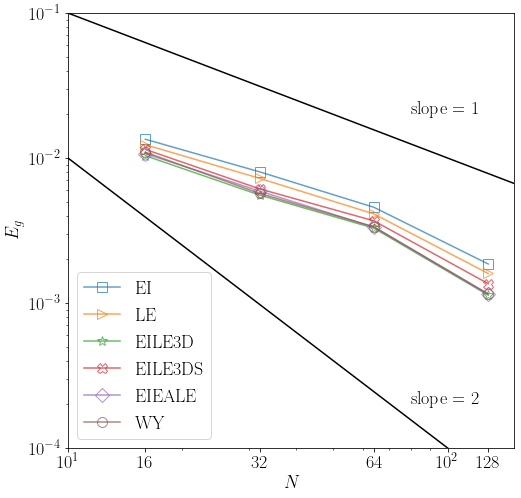

In [27]:
f1_reg = paramreso_r2['eg']
fig_reg = plt.figure(figsize=[8,8])
ax1_reg = fig_reg.add_subplot(111) 
plot_param_grid(f1_reg,ax1_reg)
ax1_reg.set_ylabel(r'$E_g$')


xx1 = [1e0,1e3]
yy1 = [1e0,1e-6]
yy2 = [1e0,0.001]
ax1_reg.plot(xx1,yy1,'k')
ax1_reg.plot(xx1,yy2,'k')
ax1_reg.text(80,0.0002,'slope = 2')
ax1_reg.text(80,0.02,'slope = 1')

ax1_reg.set_aspect('auto')
# x, y range

ax1_reg.set_ylim([0.0001,0.1])
ax1_reg.set_xlim([10,150])
ax1_reg.set_ylim([0.0001,0.1])
ax1_reg.set_xticks([10,16,32,64,100,128])
ax1_reg.set_xticklabels([r'$10^1$','16','32','64',r'$10^2$','128'])
plt.savefig('plots/rv3d-eg-cfl10.pdf',box_inches='tight', pad_inches = 0)
f1_reg

## $E_m$, CFL=0.3

,EI,LE,EILE3D,EILE3DS,EIEALE,WY
16,0.095343,-0.097022,1.496678e-14,0.001934,0.000009,1.386268e-14
32,0.047310,-0.047571,3.337432e-14,0.000390,0.000015,2.208595e-14
64,0.023605,-0.023710,4.208775e-14,0.000108,0.000007,2.883563e-14
128,0.011835,-0.011862,6.392989e-14,0.000027,0.000004,3.116735e-14


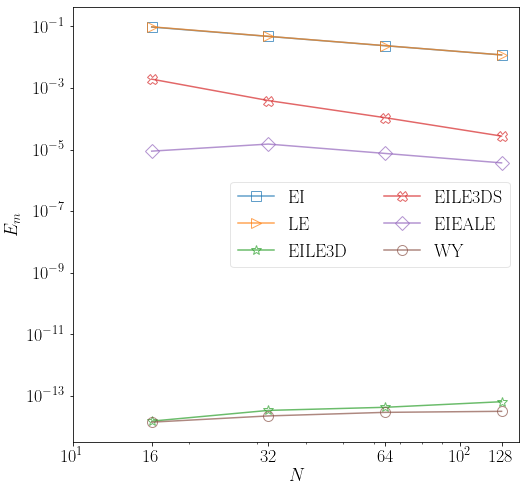

In [34]:
f1_reg = paramreso_r1['em']
fig_reg = plt.figure(figsize=[8,8])
ax1_reg = fig_reg.add_subplot(111) 
plot_param_grid(f1_reg,ax1_reg)
ax1_reg.set_ylabel(r'$E_m$')


# xx1 = [1e0,1e3]
# yy1 = [1e0,1e-6]
# yy2 = [1e0,0.001]
# ax1_zeg.plot(xx1,yy1,'k')
# ax1_zeg.plot(xx1,yy2,'k')
# ax1_zeg.text(80,0.0002,'slope = 2')
# ax1_zeg.text(150,0.007,'slope = 1')

ax1_reg.set_aspect('auto')
# x, y range

# ax1_zeg.set_ylim([0.0001,0.1])
ax1_zeg.set_xlim([10,150])
# ax1_zeg.set_ylim([0.0001,0.1])
ax1_reg.legend(ncol=2,facecolor='white', framealpha=0.5)
ax1_reg.set_xticks([10,16,32,64,100,128])
ax1_reg.set_xticklabels([r'$10^1$','16','32','64',r'$10^2$','128'])
plt.savefig('plots/rv3d-em-cfl03.pdf',box_inches='tight', pad_inches = 0)
f1_reg

## $E_m$, CFL=1.0

,EI,LE,EILE3D,EILE3DS,EIEALE,WY
16,0.294644,-0.307337,7.360714e-15,0.028435,-0.000233,-0.000657
32,0.153613,-0.155436,1.337427e-14,0.005662,0.000523,-0.000022
64,0.077972,-0.079042,1.938736e-14,0.001333,0.000381,0.000171
128,0.039276,-0.039586,7.902274e-14,0.000317,0.000200,0.000119


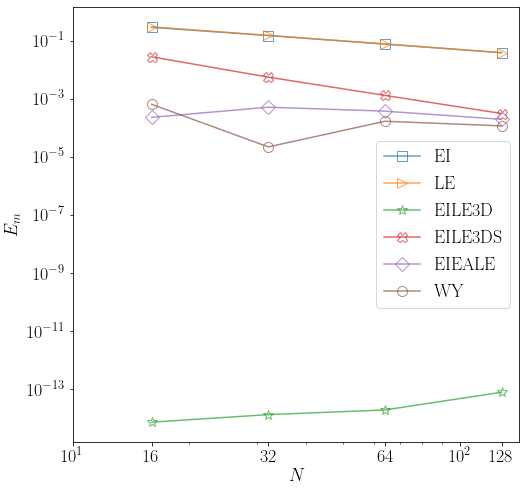

In [35]:
f1_reg = paramreso_r2['em']
fig_reg = plt.figure(figsize=[8,8])
ax1_reg = fig_reg.add_subplot(111) 
plot_param_grid(f1_reg,ax1_reg)
ax1_reg.set_ylabel(r'$E_m$')


# xx1 = [1e0,1e3]
# yy1 = [1e0,1e-6]
# yy2 = [1e0,0.001]
# ax1_zeg.plot(xx1,yy1,'k')
# ax1_zeg.plot(xx1,yy2,'k')
# ax1_zeg.text(80,0.0002,'slope = 2')
# ax1_zeg.text(150,0.007,'slope = 1')

ax1_reg.set_aspect('auto')
# x, y range

# ax1_zeg.set_ylim([0.0001,0.1])
ax1_zeg.set_xlim([10,300])
# ax1_zeg.set_ylim([0.0001,0.1])
ax1_reg.set_xticks([10,16,32,64,100,128])
ax1_reg.set_xticklabels([r'$10^1$','16','32','64',r'$10^2$','128'])
plt.savefig('plots/rv3d-em-cfl10.pdf',box_inches='tight', pad_inches = 0)
f1_reg

## $E_g$, N=64

,EI,LE,EILE3D,EILE3DS,EIEALE,WY
0.05,0.002203,0.002194,0.002282,0.002188,0.002175,0.002176
0.10,0.002186,0.002173,0.002209,0.002147,0.002118,0.002121
0.15,0.002308,0.002255,0.002188,0.002204,0.002181,0.002176
0.20,0.002389,0.002304,0.002275,0.002274,0.002209,0.002217
0.25,0.002495,0.002355,0.002301,0.002354,0.002257,0.002316
0.30,0.002635,0.002447,0.002366,0.002415,0.002348,0.002337
0.50,0.003163,0.002814,0.002560,0.002741,0.002572,0.002580
0.80,0.004007,0.003533,0.002980,0.003303,0.002977,0.003008
1.00,0.004570,0.004112,0.003279,0.003685,0.003337,0.003350


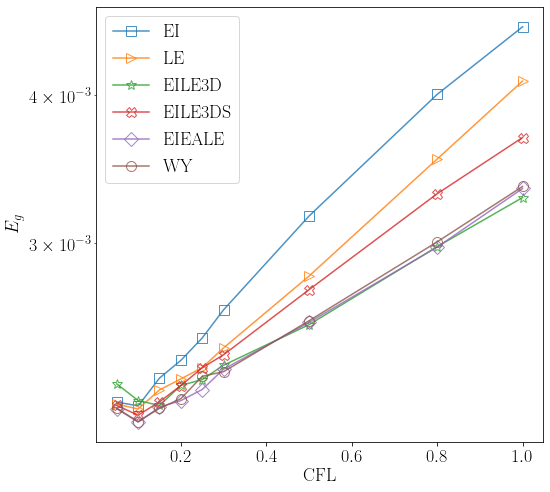

In [30]:
f1_reg = paramcfl_r['eg']
fig_reg = plt.figure(figsize=[8,8])
ax1_reg = fig_reg.add_subplot(111) 
plot_param_cfl(f1_reg,ax1_reg)
ax1_reg.set_ylabel(r'$E_g$')
plt.savefig('plots/rv3d-eg-n64.pdf',box_inches='tight', pad_inches = 0)
f1_reg

## $E_m$, N=64

,EI,LE,EILE3D,EILE3DS,EIEALE,WY
0.05,0.003949,-0.003953,1.670012e-13,0.000003,6.244946e-08,1.409878e-13
0.10,0.007892,-0.007902,6.601519e-14,0.000013,3.504976e-07,7.889919e-14
0.15,0.011828,-0.011853,7.484993e-14,0.000027,1.096741e-06,5.840749e-14
0.20,0.015764,-0.015802,5.435823e-14,0.000054,2.085102e-06,4.883651e-14
0.25,0.019692,-0.019758,4.846840e-14,0.000081,3.986417e-06,3.472546e-14
0.30,0.023605,-0.023710,4.208775e-14,0.000108,7.463564e-06,2.883563e-14
0.50,0.039277,-0.039526,2.859022e-14,0.000325,3.691141e-05,2.257768e-14
0.80,0.062580,-0.063256,1.398835e-14,0.000846,1.614848e-04,1.481125e-05
1.00,0.077972,-0.079042,1.938736e-14,0.001333,3.810550e-04,1.711549e-04


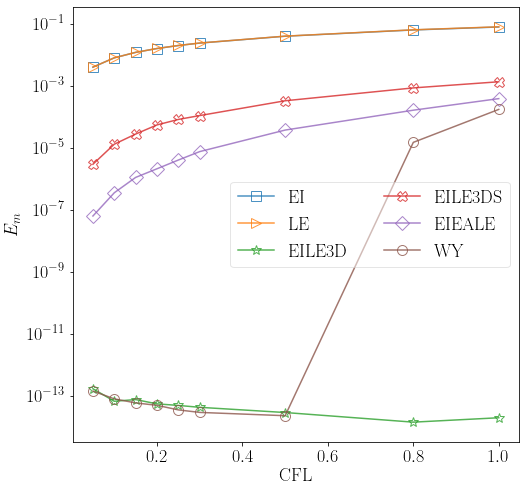

In [36]:
f1_reg = paramcfl_r['em']
fig_reg = plt.figure(figsize=[8,8])
ax1_reg = fig_reg.add_subplot(111) 
plot_param_cfl(f1_reg,ax1_reg)
ax1_reg.set_ylabel(r'$E_m$')
ax1_reg.legend(ncol=2,facecolor='white', framealpha=0.5)
plt.savefig('plots/rv3d-em-n64.pdf',box_inches='tight', pad_inches = 0)
f1_reg